In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
# Load the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)


In [3]:
max_len = 500
# Pad and truncate the sequences
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [4]:
model = Sequential()
model.add(Embedding(10000, 32, input_length=max_len))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [5]:
model.fit(x_train, y_train, validation_split=0.2, epochs=5, batch_size=128)


Epoch 1/5
157/157 [==============================] - 6s 34ms/step - loss: 0.5312 - accuracy: 0.6982 - val_loss: 0.3183 - val_accuracy: 0.8660
Epoch 2/5
157/157 [==============================] - 5s 33ms/step - loss: 0.1844 - accuracy: 0.9301 - val_loss: 0.3100 - val_accuracy: 0.8732
Epoch 3/5
157/157 [==============================] - 5s 32ms/step - loss: 0.0542 - accuracy: 0.9858 - val_loss: 0.3629 - val_accuracy: 0.8712
Epoch 4/5
157/157 [==============================] - 5s 32ms/step - loss: 0.0118 - accuracy: 0.9989 - val_loss: 0.4179 - val_accuracy: 0.8736
Epoch 5/5
157/157 [==============================] - 5s 32ms/step - loss: 0.0036 - accuracy: 0.9999 - val_loss: 0.4604 - val_accuracy: 0.8724


In [6]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

782/782 [==============================] - 4s 5ms/step - loss: 0.4632 - accuracy: 0.8708
Test accuracy: 87.08%


In [9]:
def predict_review(review):
    # Convert the review to a sequence of word indices
    seq = imdb.get_word_index()
    words = review.split()
    seq = [seq[w] if w in seq else 0 for w in words]
    seq = pad_sequences([seq], maxlen=max_len)
    # Make the prediction
    pred = model.predict(seq)[0]
    # Return the prediction
    return 'positive' if pred >= 0.5 else 'negative'
    review = "This movie was great! I loved the story and the acting was superb."
    prediction = predict_review(review)
    print(f'Review: {review}')
    print(f'Prediction: {prediction}')
    

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 flatten (Flatten)           (None, 16000)             0         
                                                                 
 dense (Dense)               (None, 128)               2048128   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,368,257
Trainable params: 2,368,257
Non-trainable params: 0
_________________________________________________________________


782/782 [==============================] - 3s 4ms/step


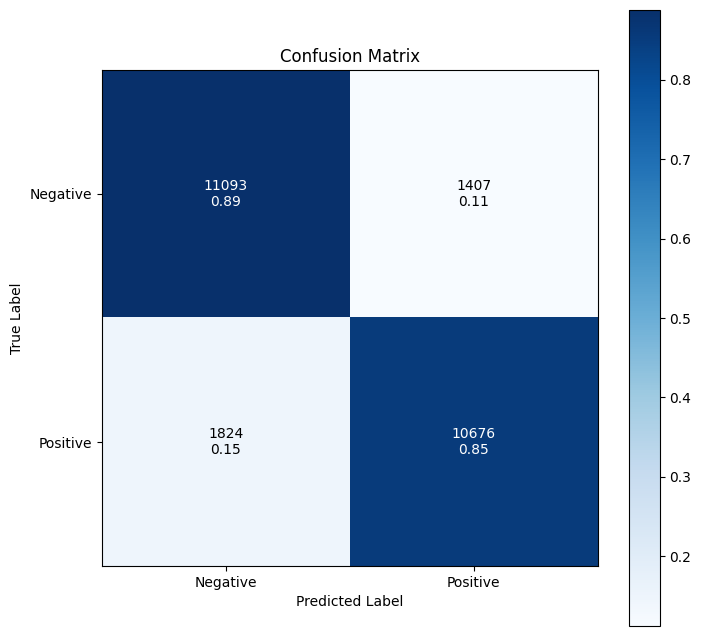

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Get predicted labels
y_pred = np.round(model.predict(x_test))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Set up plot
fig, ax = plt.subplots(figsize=(8, 8))

# Plot confusion matrix
im = ax.imshow(cm_norm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Set labels
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'],
       title='Confusion Matrix',
       ylabel='True Label',
       xlabel='Predicted Label')

# Add labels to each cell
thresh = cm_norm.max() / 2.
for i in range(cm_norm.shape[0]):
    for j in range(cm_norm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd') + '\n' + format(cm_norm[i, j], '.2f'),
                ha="center", va="center",
                color="white" if cm_norm[i, j] > thresh else "black")

# Show plot
plt.show()


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.86      0.89      0.87     12500
    Positive       0.88      0.85      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000

